In [1]:
try:
    import pulser
except ModuleNotFoundError:
    import sys
    sys.path.insert(1, '../')

# Preparing an AF state in the Ising model

This purpose of this notebook is to illustrate how to build a sequence for preparing an AF state in the Ising model. This notebook is supposed to evolve with code updates. 

In [2]:
import numpy as np

from pulser import Pulse, Sequence, Register
from pulser.waveforms import ConstantWaveform, RampWaveform
from pulser.devices import Chadoq2

## Initializing my device

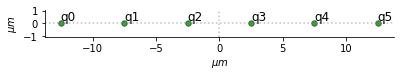

In [3]:
line_qubits = Register.rectangle(1, 6, spacing=5, prefix='q')
line_qubits.draw()

In [4]:
my_device = Chadoq2(line_qubits) 
print(my_device.qubits)
print(my_device.name)

{'q0': array([-12.5,   0. ]), 'q1': array([-7.5,  0. ]), 'q2': array([-2.5,  0. ]), 'q3': array([2.5, 0. ]), 'q4': array([7.5, 0. ]), 'q5': array([12.5,  0. ])}
Chadoq2


## Defining my waveforms 

We are realizing the following program![AF_Ising_program.png](files/AF_Ising_program.png)

In [5]:
# Parameters in MHz and ns
delta_0 = -8 
delta_f = 4  
Omega_max = 1.2 
t_rise = 250
t_fall = 250
t_sweep = (delta_f-delta_0)/(2*np.pi*10) * 1000
pulses= [] 

In [6]:
rabi_waveform = RampWaveform(t_rise, 0., Omega_max)
pulses.append(Pulse.ConstantDetuning(rabi_waveform, delta_0, 0.))
print(Pulse.ConstantDetuning(rabi_waveform, delta_0, 0.))

Pulse(Amp=Ramp(0->1.2 MHz), Detuning=-8 MHz, Phase=0)


In [7]:
detuning_waveform = RampWaveform(t_sweep, delta_0, delta_f)
pulses.append(Pulse.ConstantAmplitude(Omega_max, detuning_waveform, 0.))

../pulser/utils.py:21: UserWarning: The given duration is below the machine's precision of 1 ns time steps. It was rounded down to the nearest integer.
  warnings.warn("The given duration is below the machine's precision"


In [8]:
rabi_waveform = RampWaveform(t_fall, Omega_max, 0.)
pulses.append(Pulse.ConstantDetuning(rabi_waveform, delta_f, 0.))

## Creating my sequence

In [9]:
af_sequence = Sequence(my_device)

In [10]:
af_sequence.available_channels

{'rydberg_global': Rydberg(global, Max Absolute Detuning: 50 MHz, Max Amplitude: 2.5 MHz, Basis: 'ground-rydberg'),
 'rydberg_local': Rydberg(local, Max Absolute Detuning: 50 MHz, Max Amplitude: 10 MHz, Target time: 100 ns, Basis: 'ground-rydberg'),
 'rydberg_local2': Rydberg(local, Max Absolute Detuning: 50 MHz, Max Amplitude: 10 MHz, Target time: 100 ns, Basis: 'ground-rydberg'),
 'raman_local': Raman(local, Max Absolute Detuning: 50 MHz, Max Amplitude: 10 MHz, Target time: 100 ns, Basis: 'digital')}

In [11]:
## Are we sure about the values here ?

In [12]:
af_sequence.declare_channel('Ising_channel', 'rydberg_global')

In [13]:
for pulse in pulses:
    print(pulse)
    af_sequence.add(pulse, 'Ising_channel')

Pulse(Amp=Ramp(0->1.2 MHz), Detuning=-8 MHz, Phase=0)
Pulse(Amp=1.2 MHz, Detuning=Ramp(-8->4 MHz), Phase=0)
Pulse(Amp=Ramp(1.2->0 MHz), Detuning=4 MHz, Phase=0)


Channel: Ising_channel
t: 0 | Initial targets: q3, q4, q2, q0, q1, q5 | Phase Reference: 0.0 
t: 0->250 | Pulse(Amp=Ramp(0->1.2 MHz), Detuning=-8 MHz, Phase=0) | Targets: q3, q4, q2, q0, q1, q5
t: 250->440 | Pulse(Amp=1.2 MHz, Detuning=Ramp(-8->4 MHz), Phase=0) | Targets: q3, q4, q2, q0, q1, q5
t: 440->690 | Pulse(Amp=Ramp(1.2->0 MHz), Detuning=4 MHz, Phase=0) | Targets: q3, q4, q2, q0, q1, q5




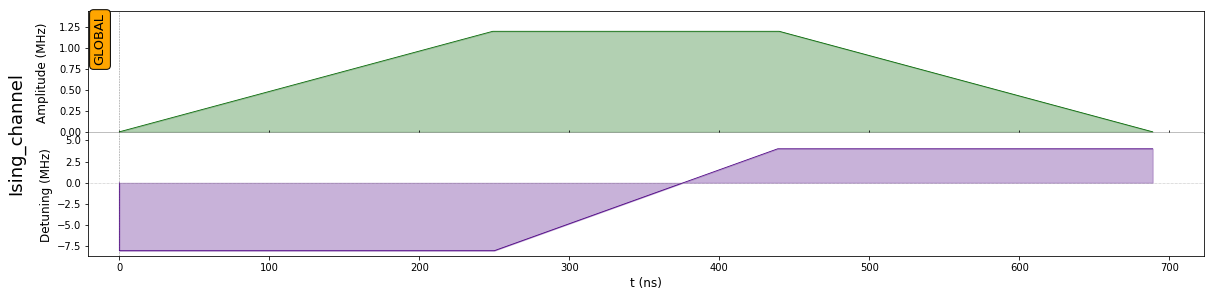

In [14]:
print(af_sequence)
af_sequence.draw()